<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/Boston%20Housing%20Price%20Predicter/HousePricePredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 404 samples                 102 samples
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

57344/57026 [==============================] - 0s 1us/step
(404, 13)
(102, 13)


In [0]:
# Feature normalization to reduce the range of values
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
# Define the network
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
# Divide the samples into K partitions
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_maedata = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0,
              validation_data=(val_data, val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_maedata.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


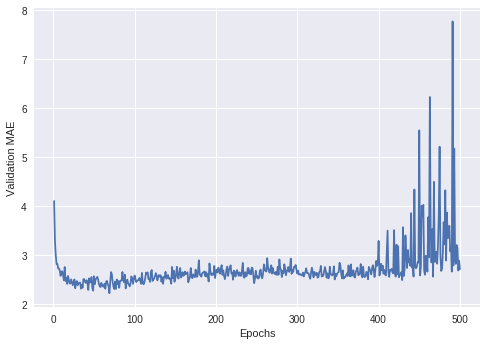

In [8]:
average_mae_history = [
    np.mean([x[i] for x in all_maedata]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()